# Initialize

## Initialization

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
from jupyterthemes import jtplot
jtplot.reset()

fig_dir = "figures/"
paper_fig_dir = "C:\\Users\\rtorre\\Dropbox\\Work\\04_Projects\\Git\\GitHub\\NormalizingFlows\\NormalizingFlows\\papers\\NFHD\\figures\\" 

## Useful functions

In [5]:
def build_data_from_runs(path,save_file_name,results="succeeded"):
    print("Processing path", path,"for",results,"runs.")
    runs_list=[[int(i.replace("run_","")),os.path.abspath(os.path.join(os.path.join(path,i),"results.txt"))] for i in os.listdir(path) if ("run" in i and os.path.isdir(os.path.abspath(os.path.join(path,i))))]
    runs_list.sort()
    if os.path.exists(runs_list[0][1]):
        data=pd.read_csv(runs_list[0][1])
        i=1
        j=0
    else:
        print("No results available for run",runs_list[0][1])
        data=pd.DataFrame()
        i=0
        j=0
    for run in runs_list[1:]:
        if os.path.exists(run[1]):
            tmp = pd.read_csv(run[1]).pop("time")
            if 'nan' in str(tmp) or "failed" in str(tmp):
                if results == "all":
                    data=pd.concat([data,pd.read_csv(run[1])])
                else:
                    pass
            else:
                data=pd.concat([data,pd.read_csv(run[1])])
            i=i+1
        else:
            j=j+1
            print("No results available for run",run[0])
    data = data.reset_index(drop=True).replace("failed","nan")
    print("Succesfully imported", i, "runs (failed to import",j,"runs).")
    save_path = os.path.abspath(os.path.join(path,save_file_name))
    data.to_csv(save_path,index=False)
    print("Succesfully saved data to file", save_path)
    return data

In [6]:
def extract_lines(df_bests,bij,corr,metric):
    result = []
    for df in df_bests:
        tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
        if tmp != []:
            result.append(tmp)
    return np.array(result)

# Results for uncorrelated mixture

## Check, fix, import results

### Check and fix results

In [73]:
uncorrelated_results_paths = {"MAFN": "UMoG/results/MAFN/",
                             "RealNVPN": "UMoG/results/RealNVPN/",
                             "MsplineN": "UMoG/results/MsplineN/",
                             "CsplineN": "UMoG/results/CsplineN/"
                            }

In [74]:
for res in uncorrelated_results_paths.values():
    build_data_from_runs(res,"log_file_eternal_final.txt")

Processing path UMoG/results/MAFN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\UMoG\results\MAFN\log_file_eternal_final.txt
Processing path UMoG/results/RealNVPN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\UMoG\results\RealNVPN\log_file_eternal_final.txt
Processing path UMoG/results/MsplineN/ for succeeded runs.
Succesfully imported 36 runs (failed to import 0 runs).
Succesfully saved data to file C:\Users\rtorre\Dropbox\Work\04_Projects\Git\GitHub\NormalizingFlows\NormalizingFlowsHD-2\Riccardo\UMoG\results\MsplineN\log_file_eternal_final.txt
Processing path UMoG/results/CsplineN/ for succeeded runs.
Succesfully imported 57 runs (failed to import 0 runs).
Succesfully

### Import results

In [75]:
tmp_paths = {k: v+"log_file_eternal_final.txt" for k,v in uncorrelated_results_paths.items()}
tmp = {k: pd.read_csv(tmp_paths[k]) for k in tmp_paths.keys()}
try:
    for k in tmp.keys():
        tmp[k]["epochs_input"] = tmp[k]["epochs_input"].fillna(1000)
        tmp[k]["epochs_output"] = tmp[k]["epochs_output"].fillna(0)
except:
    pass
df_uncorrelated = pd.concat([df for df in tmp.values()],ignore_index=True).dropna().reset_index(drop=True)
df_uncorrelated = df_uncorrelated[~(df_uncorrelated == 'failed').any(axis=1)]
len(df_uncorrelated)

161

## Correlation of metrics

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.988612,0.941002,0.961309,0.881727,0.881727,0.239084
ks_test_median,0.988612,1.000000,0.940798,0.969263,0.865545,0.865545,0.195428
ad_test_mean,0.941002,0.940798,1.000000,0.980052,0.825719,0.825719,0.118171
ad_test_median,0.961309,0.969263,0.980052,1.000000,0.826023,0.826023,0.139506
Wasserstein_median,0.881727,0.865545,0.825719,0.826023,1.000000,1.000000,0.233238
Wasserstein_mean,0.881727,0.865545,0.825719,0.826023,1.000000,1.000000,0.233238
frob_norm,0.239084,0.195428,0.118171,0.139506,0.233238,0.233238,1.000000


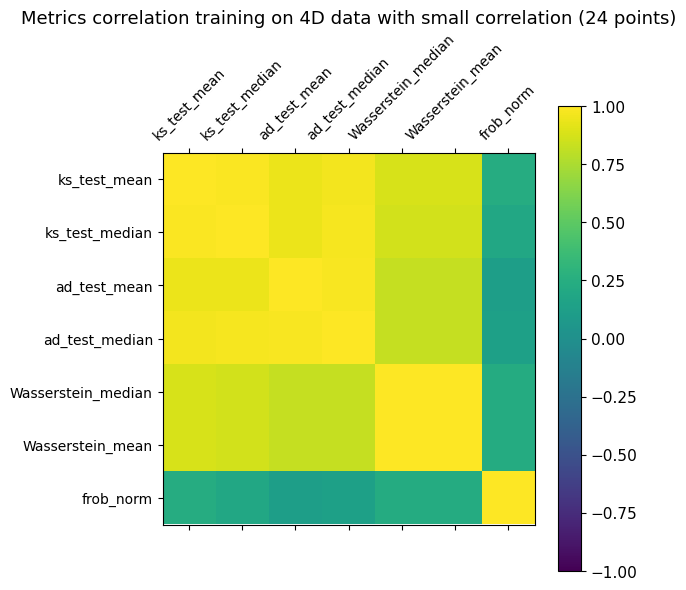

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.982438,0.940424,0.973831,0.917038,0.917038,0.601875
ks_test_median,0.982438,1.000000,0.948001,0.965893,0.928017,0.928017,0.616329
ad_test_mean,0.940424,0.948001,1.000000,0.971730,0.888939,0.888939,0.615762
ad_test_median,0.973831,0.965893,0.971730,1.000000,0.908830,0.908830,0.618332
Wasserstein_median,0.917038,0.928017,0.888939,0.908830,1.000000,1.000000,0.504968
Wasserstein_mean,0.917038,0.928017,0.888939,0.908830,1.000000,1.000000,0.504968
frob_norm,0.601875,0.616329,0.615762,0.618332,0.504968,0.504968,1.000000


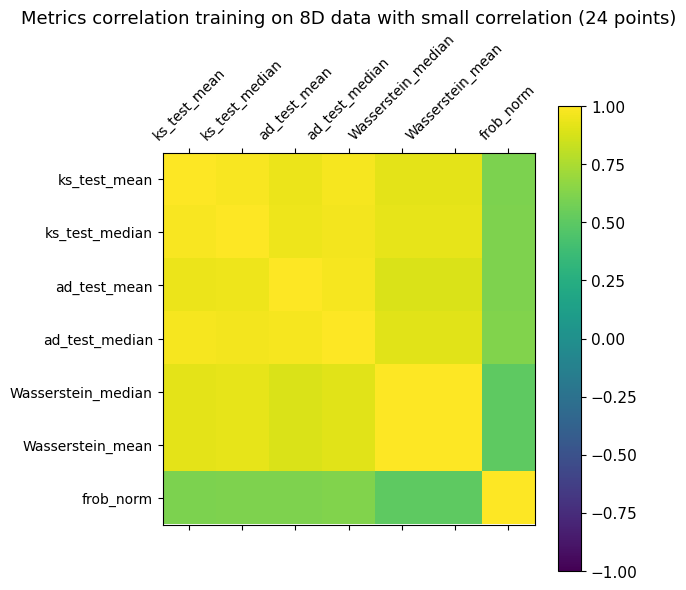

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.985343,0.959659,0.976907,0.808281,0.808281,0.634336
ks_test_median,0.985343,1.000000,0.945482,0.956954,0.780946,0.780946,0.604535
ad_test_mean,0.959659,0.945482,1.000000,0.984732,0.862925,0.862925,0.619372
ad_test_median,0.976907,0.956954,0.984732,1.000000,0.870354,0.870354,0.645155
Wasserstein_median,0.808281,0.780946,0.862925,0.870354,1.000000,1.000000,0.577466
Wasserstein_mean,0.808281,0.780946,0.862925,0.870354,1.000000,1.000000,0.577466
frob_norm,0.634336,0.604535,0.619372,0.645155,0.577466,0.577466,1.000000


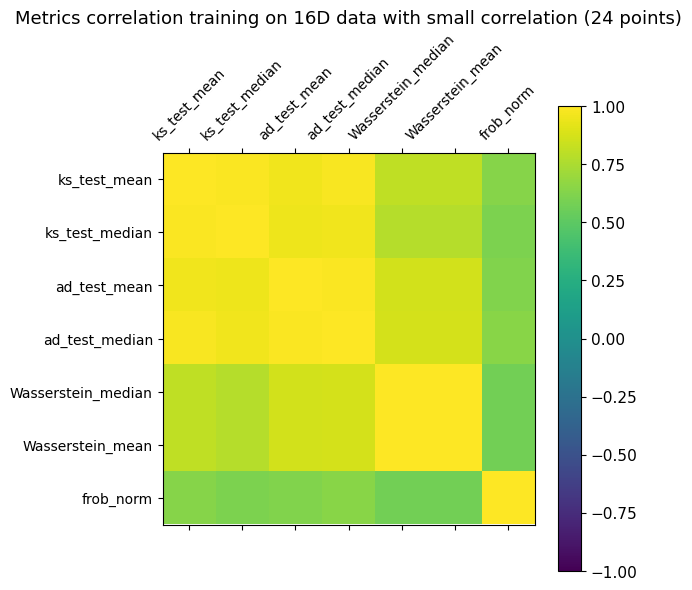

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.987942,0.984798,0.978973,0.771116,0.771116,0.812750
ks_test_median,0.987942,1.000000,0.964354,0.943565,0.696312,0.696312,0.752655
ad_test_mean,0.984798,0.964354,1.000000,0.987354,0.769042,0.769042,0.810147
ad_test_median,0.978973,0.943565,0.987354,1.000000,0.822874,0.822874,0.853549
Wasserstein_median,0.771116,0.696312,0.769042,0.822874,1.000000,1.000000,0.920141
Wasserstein_mean,0.771116,0.696312,0.769042,0.822874,1.000000,1.000000,0.920141
frob_norm,0.812750,0.752655,0.810147,0.853549,0.920141,0.920141,1.000000


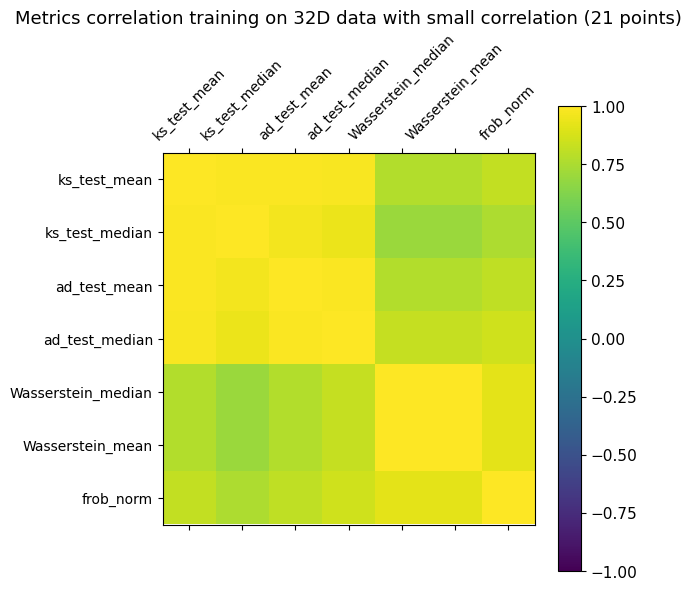

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.984844,0.979939,0.989715,0.935319,0.935319,0.535343
ks_test_median,0.984844,1.000000,0.979936,0.958671,0.887883,0.887883,0.478494
ad_test_mean,0.979939,0.979936,1.000000,0.978642,0.929698,0.929698,0.524247
ad_test_median,0.989715,0.958671,0.978642,1.000000,0.966306,0.966306,0.582408
Wasserstein_median,0.935319,0.887883,0.929698,0.966306,1.000000,1.000000,0.641056
Wasserstein_mean,0.935319,0.887883,0.929698,0.966306,1.000000,1.000000,0.641056
frob_norm,0.535343,0.478494,0.524247,0.582408,0.641056,0.641056,1.000000


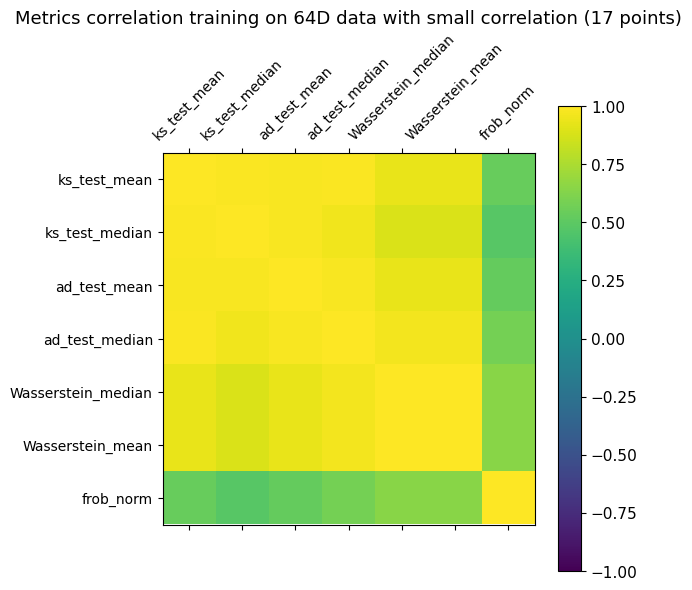

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.992928,0.996418,0.995556,0.859826,0.859826,0.316802
ks_test_median,0.992928,1.000000,0.995002,0.978813,0.807061,0.807061,0.278489
ad_test_mean,0.996418,0.995002,1.000000,0.987495,0.836151,0.836151,0.295057
ad_test_median,0.995556,0.978813,0.987495,1.000000,0.895837,0.895837,0.343896
Wasserstein_median,0.859826,0.807061,0.836151,0.895837,1.000000,1.000000,0.621225
Wasserstein_mean,0.859826,0.807061,0.836151,0.895837,1.000000,1.000000,0.621225
frob_norm,0.316802,0.278489,0.295057,0.343896,0.621225,0.621225,1.000000


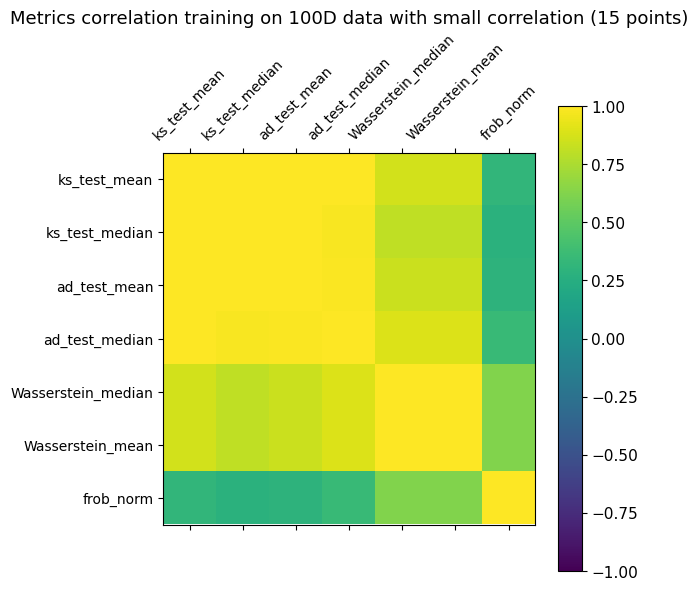

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.999864,0.998982,0.999839,0.989104,0.989104,0.372985
ks_test_median,0.999864,1.000000,0.999235,0.999881,0.989172,0.989172,0.373525
ad_test_mean,0.998982,0.999235,1.000000,0.999618,0.990883,0.990883,0.374532
ad_test_median,0.999839,0.999881,0.999618,1.000000,0.990132,0.990132,0.373138
Wasserstein_median,0.989104,0.989172,0.990883,0.990132,1.000000,1.000000,0.416666
Wasserstein_mean,0.989104,0.989172,0.990883,0.990132,1.000000,1.000000,0.416666
frob_norm,0.372985,0.373525,0.374532,0.373138,0.416666,0.416666,1.000000


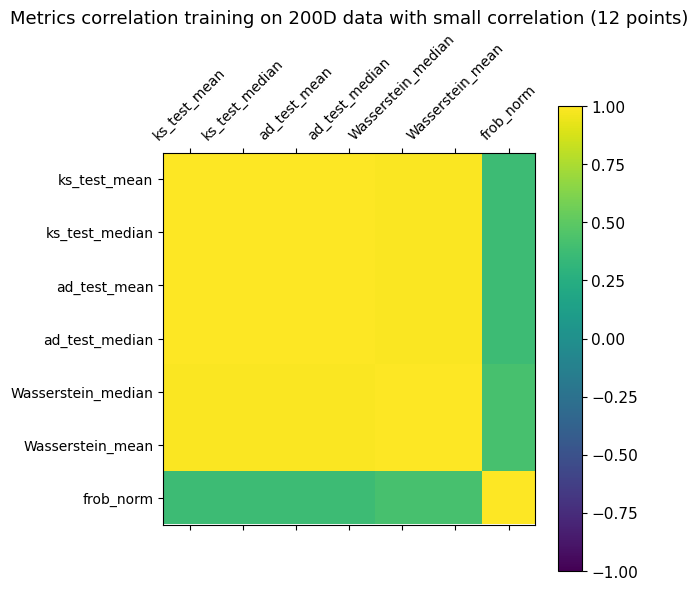

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.999765,0.999659,0.999810,0.996981,0.996981,0.257514
ks_test_median,0.999765,1.000000,0.999979,0.999946,0.996847,0.996847,0.254232
ad_test_mean,0.999659,0.999979,1.000000,0.999936,0.996882,0.996882,0.254243
ad_test_median,0.999810,0.999946,0.999936,1.000000,0.997220,0.997220,0.257444
Wasserstein_median,0.996981,0.996847,0.996882,0.997220,1.000000,1.000000,0.303083
Wasserstein_mean,0.996981,0.996847,0.996882,0.997220,1.000000,1.000000,0.303083
frob_norm,0.257514,0.254232,0.254243,0.257444,0.303083,0.303083,1.000000


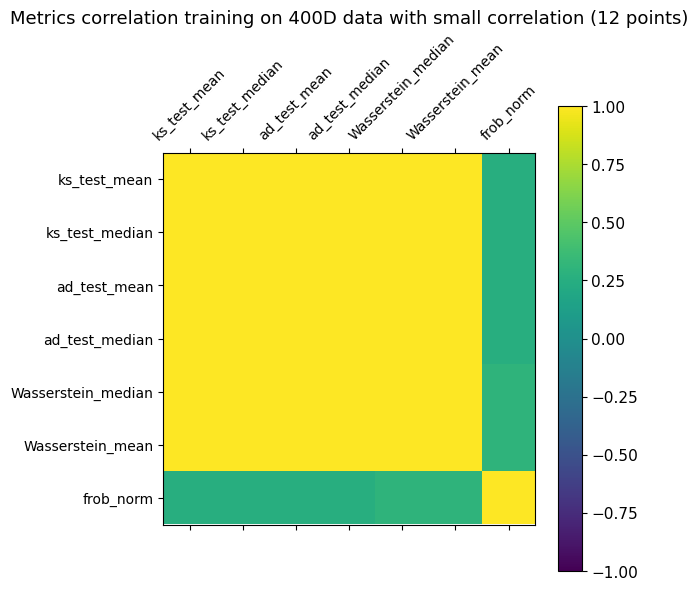

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3780393643.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,1.000000,0.999770,0.997691,0.999660,0.993239,0.993239,0.357549
ks_test_median,0.999770,1.000000,0.998866,0.999968,0.995088,0.995088,0.356408
ad_test_mean,0.997691,0.998866,1.000000,0.999079,0.998186,0.998186,0.357891
ad_test_median,0.999660,0.999968,0.999079,1.000000,0.995589,0.995589,0.358525
Wasserstein_median,0.993239,0.995088,0.998186,0.995589,1.000000,1.000000,0.395028
Wasserstein_mean,0.993239,0.995088,0.998186,0.995589,1.000000,1.000000,0.395028
frob_norm,0.357549,0.356408,0.357891,0.358525,0.395028,0.395028,1.000000


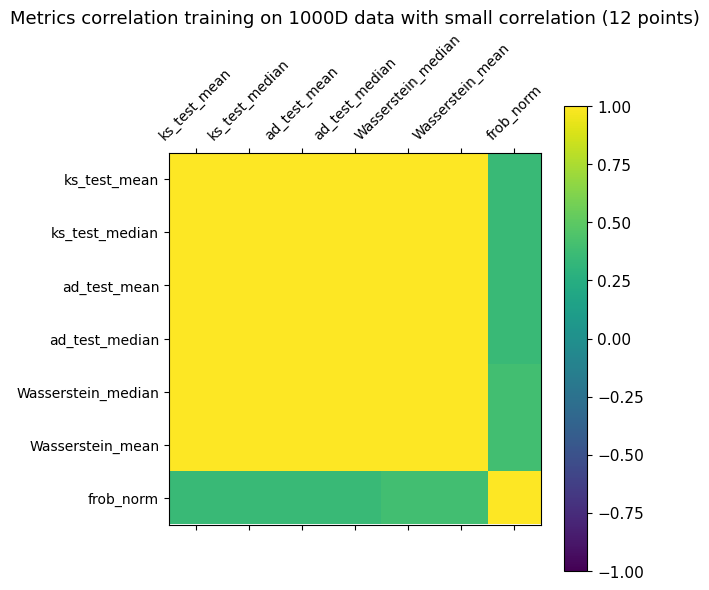

In [10]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="corr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with small correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


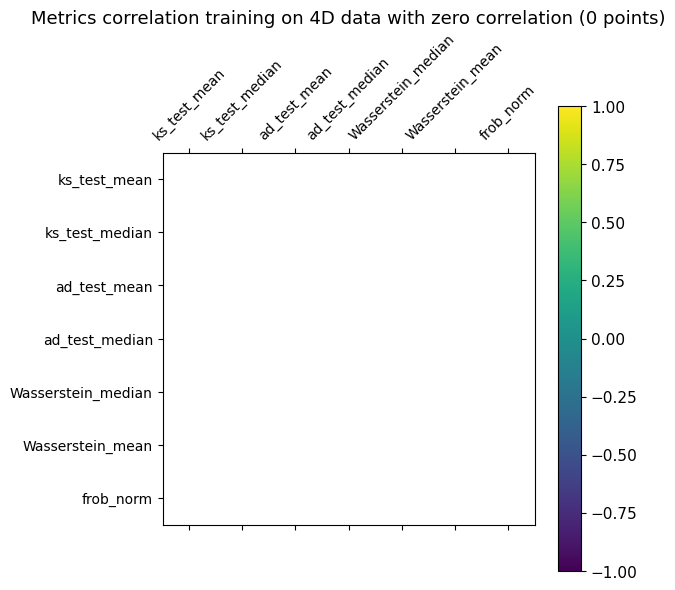

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


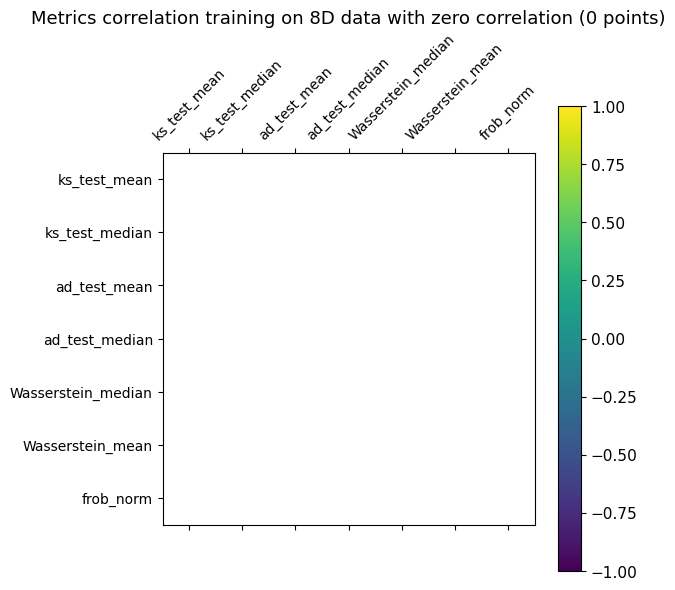

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


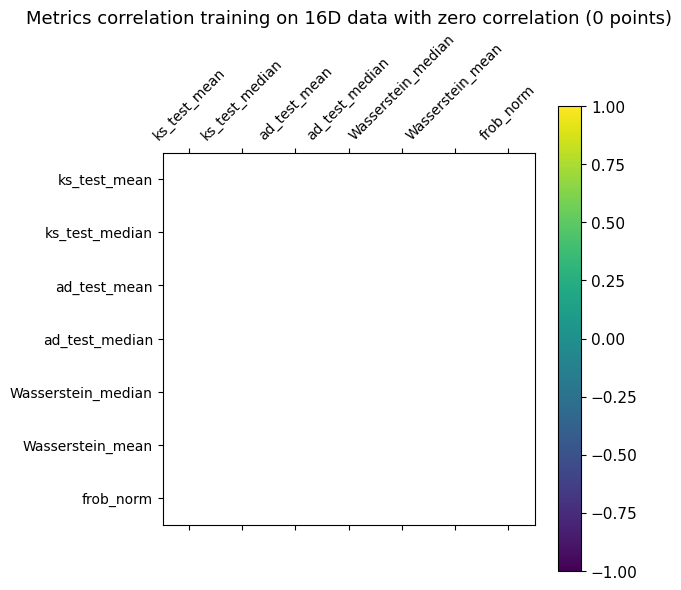

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


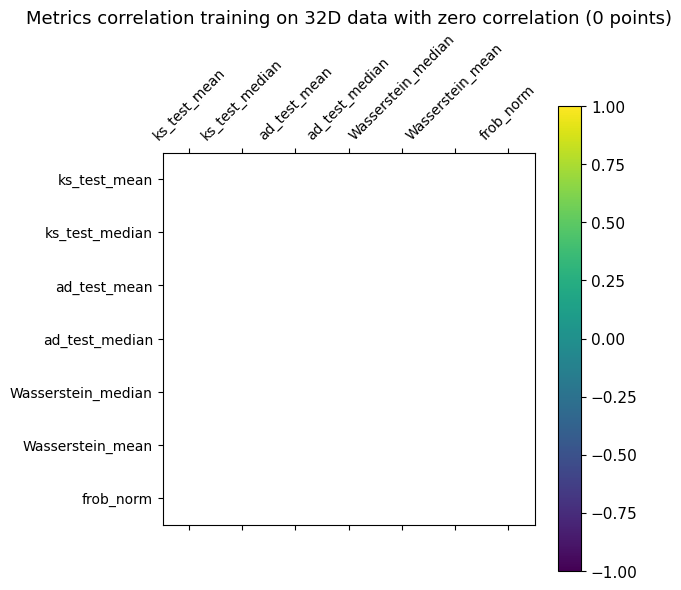

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


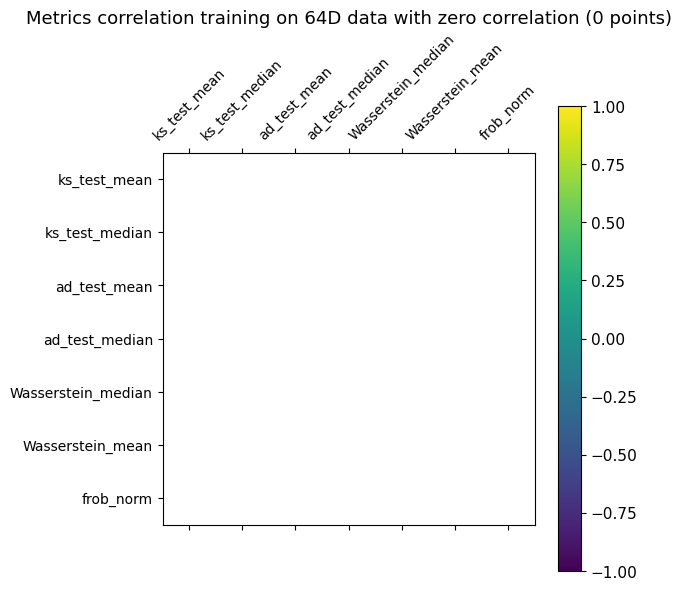

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


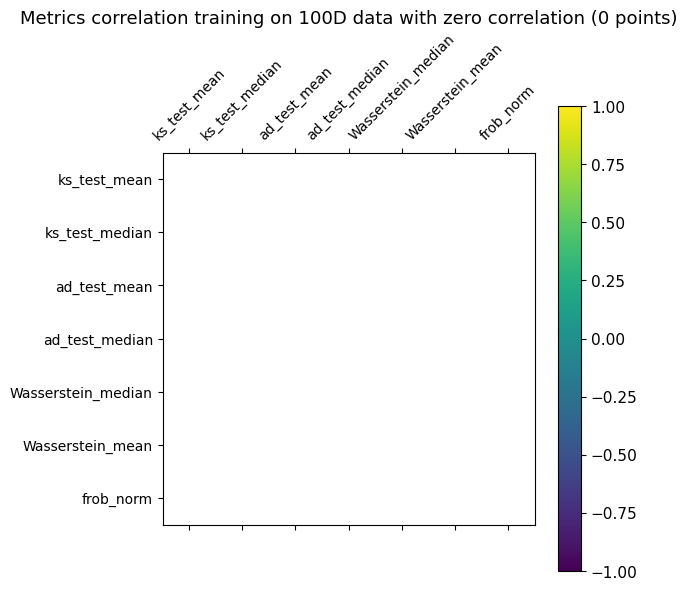

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


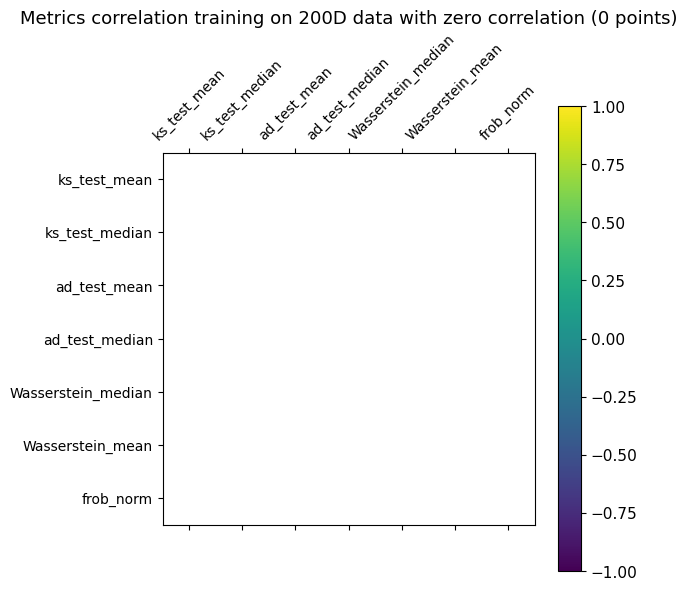

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


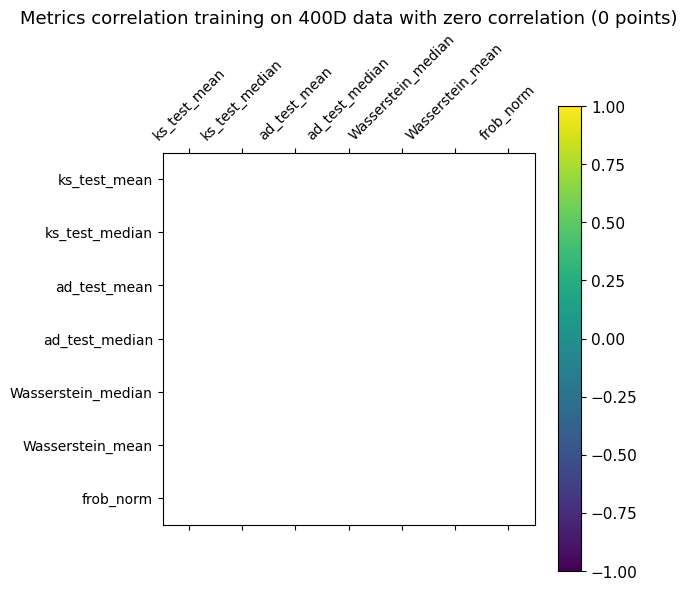

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1663735221.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]


,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm
ks_test_mean,nan,nan,nan,nan,nan,nan,nan
ks_test_median,nan,nan,nan,nan,nan,nan,nan
ad_test_mean,nan,nan,nan,nan,nan,nan,nan
ad_test_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_median,nan,nan,nan,nan,nan,nan,nan
Wasserstein_mean,nan,nan,nan,nan,nan,nan,nan
frob_norm,nan,nan,nan,nan,nan,nan,nan


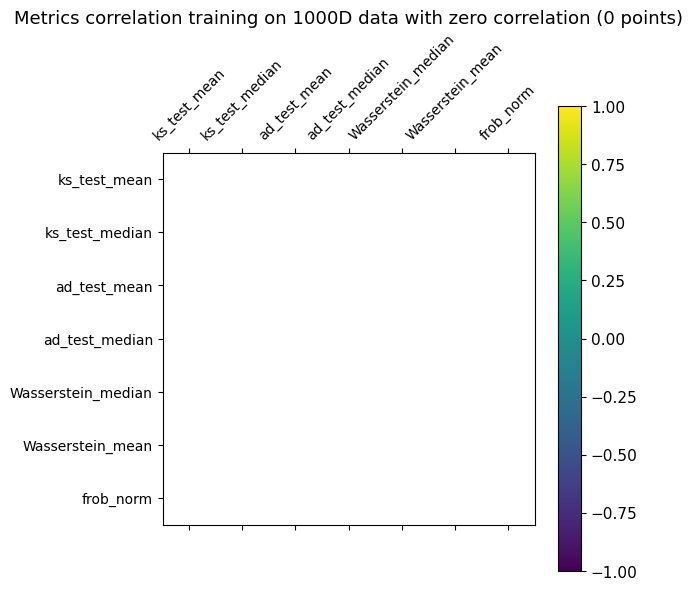

In [15]:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'lime')])]
metrics = ["ks_test_mean", "ks_test_median","ad_test_mean", "ad_test_median","Wasserstein_median", "Wasserstein_mean","frob_norm"]
for d in [4,8,16,32,64,100,200,400,1000]:
    df=df_uncorrelated[df_uncorrelated["ndims"]==d][df_uncorrelated["correlation"]=="uncorr"][metrics]
    df=df.astype(float)
    n_points=len(df)
    df['Wasserstein_median'] = df['Wasserstein_median'].apply(lambda x: -x)
    df['Wasserstein_mean'] = df['Wasserstein_mean'].apply(lambda x: -x)
    df['frob_norm'] = df['frob_norm'].apply(lambda x: -x)
    #display(df)
    title = "Metrics correlation training on "+str(d)+"D data with zero correlation ("+str(n_points)+" points)"
    corr=df.corr()
    display(corr.style.set_caption(title).set_table_styles(styles))
    jtplot.reset()
    f = plt.figure(figsize=(6, 6))
    plt.matshow(corr, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), metrics, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=11)
    plt.clim(-1, 1) 
    plt.title(title, fontsize=13)
    plt.show()
    plt.close()
    del(df)

## Results for different dimensions

### 4D

In [ ]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced = df_reduced.drop(['range_min', 'regulariser','eps_regulariser','kl_divergence'], axis=1)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

In [16]:
df_reduced_sorted[df_reduced_sorted['bijector']=="MsplineN"][df_reduced_sorted['correlation']=="corr"]

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3208656438.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced_sorted[df_reduced_sorted['bijector']=="MsplineN"][df_reduced_sorted['correlation']=="corr"]


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
2,4,0,4,100000,corr,2,MsplineN,relu,12,-16,...,0.215899,0.215800,0.019549,0.019549,0.035943,256-256-256,512,1000,377.0,2099.885369
3,1,0,4,100000,corr,2,MsplineN,relu,8,-16,...,0.214522,0.218469,0.021189,0.021189,0.029536,128-128-128,512,1000,391.0,2197.884735
4,3,0,4,100000,corr,2,MsplineN,relu,12,-16,...,0.214728,0.219215,0.024459,0.024459,0.012470,128-128-128,512,1000,342.0,1921.544924
5,2,0,4,100000,corr,2,MsplineN,relu,8,-16,...,0.220735,0.216889,0.022708,0.022708,0.042539,256-256-256,512,1000,549.0,3066.342033


In [17]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4274562246.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4274562246.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4274562246.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4274562246.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.499124,0.501233,0.214858,0.217540,0.018521,0.018521,0.044030,256-256-256,512,1000,381.000000,17067.171601
2,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.465701,0.483606,0.215899,0.215800,0.019549,0.019549,0.035943,256-256-256,512,1000,377.000000,2099.885369
9,3,0,4,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.439230,0.437921,0.217516,0.215212,0.031573,0.031573,0.045468,128-128-128,512,1000,357.000000,1606.117240
12,4,0,4,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.402367,0.428524,0.212732,0.213810,0.036360,0.036360,0.104790,256-256-256,256,1000,439.000000,4376.519111


In [18]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==4]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3688481105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.499124,0.501233,0.214858,0.217540,0.018521,0.018521,0.044030,256-256-256,512,1000,381.000000,17067.171601
1,12,0,4,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.501453,0.499710,0.219297,0.218914,0.018682,0.018682,0.031793,512-512-512,512,1000,275.000000,14104.814465
2,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.465701,0.483606,0.215899,0.215800,0.019549,0.019549,0.035943,256-256-256,512,1000,377.000000,2099.885369
3,1,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.474511,0.480428,0.214522,0.218469,0.021189,0.021189,0.029536,128-128-128,512,1000,391.000000,2197.884735
4,3,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.491028,0.478676,0.214728,0.219215,0.024459,0.024459,0.012470,128-128-128,512,1000,342.000000,1921.544924
5,2,0,4,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.481650,0.477033,0.220735,0.216889,0.022708,0.022708,0.042539,256-256-256,512,1000,549.000000,3066.342033
6,4,0,4,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.472991,0.471459,0.211847,0.216385,0.017652,0.017652,0.022267,128-128-128,512,1000,399.000000,10340.128813
7,9,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.454423,0.459614,0.211938,0.208785,0.024087,0.024087,0.036208,512-512-512,512,1000,322.000000,15777.569638
8,7,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.450947,0.452131,0.213417,0.210078,0.023452,0.023452,0.041193,128-128-128,512,1000,453.000000,19441.693191
9,3,0,4,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.439230,0.437921,0.217516,0.215212,0.031573,0.031573,0.045468,128-128-128,512,1000,357.000000,1606.117240


In [19]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_4D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_4D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\829479110.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\829479110.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\829479110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\829479110.py:6: UserWarning: Boolean Series key will be reindexed to match D

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,8,0,4,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.499124,0.501233,0.214858,0.217540,0.018521,0.018521,0.044030,256-256-256,512,1000,381.000000,17067.171601
2,4,0,4,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.465701,0.483606,0.215899,0.215800,0.019549,0.019549,0.035943,256-256-256,512,1000,377.000000,2099.885369
9,3,0,4,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.439230,0.437921,0.217516,0.215212,0.031573,0.031573,0.045468,128-128-128,512,1000,357.000000,1606.117240
12,4,0,4,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.402367,0.428524,0.212732,0.213810,0.036360,0.036360,0.104790,256-256-256,256,1000,439.000000,4376.519111


### 8D

In [20]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4142751268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,24,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.413392,0.441960,0.205985,0.202985,0.032420,0.032420,0.069367,512-512-512,512,1000,138.000000,7204.036155
1,8,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.356128,0.406835,0.200991,0.190774,0.033962,0.033962,0.079808,256-256-256,256,1000,213.000000,2056.558033
2,5,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.393132,0.378642,0.203780,0.201083,0.035807,0.035807,0.052435,128-128-128,512,1000,212.000000,1202.985300
3,6,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.373382,0.381105,0.184108,0.189304,0.043891,0.043891,0.077452,256-256-256,512,1000,114.000000,632.131833
4,23,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.375596,0.386096,0.197191,0.192051,0.044039,0.044039,0.083699,256-256-256,512,1000,129.000000,6730.259446
5,21,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.290761,0.308298,0.165262,0.161461,0.044199,0.044199,0.082462,512-512-512,512,1000,143.000000,6537.951397
6,20,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.351534,0.379314,0.188229,0.184889,0.046819,0.046819,0.120304,256-256-256,512,1000,159.000000,7111.539134
7,16,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.320181,0.359311,0.180568,0.168392,0.048409,0.048409,0.072626,128-128-128,512,1000,232.000000,5676.412482
8,8,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.370003,0.386701,0.183074,0.179387,0.049240,0.049240,0.056209,256-256-256,512,1000,139.000000,786.139821
9,7,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.342041,0.385051,0.195008,0.175037,0.049691,0.049691,0.069934,128-128-128,256,1000,219.000000,2179.819708


In [21]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2288846742.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2288846742.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2288846742.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2288846742.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,24,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.413392,0.441960,0.205985,0.202985,0.032420,0.032420,0.069367,512-512-512,512,1000,138.000000,7204.036155
1,8,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.356128,0.406835,0.200991,0.190774,0.033962,0.033962,0.079808,256-256-256,256,1000,213.000000,2056.558033
2,5,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.393132,0.378642,0.203780,0.201083,0.035807,0.035807,0.052435,128-128-128,512,1000,212.000000,1202.985300
15,7,0,8,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.241139,0.234169,0.139892,0.136652,0.069287,0.069287,0.080696,128-128-128,512,1000,207.000000,928.554179


In [22]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==8]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2613932260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,24,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.413392,0.441960,0.205985,0.202985,0.032420,0.032420,0.069367,512-512-512,512,1000,138.000000,7204.036155
1,8,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.356128,0.406835,0.200991,0.190774,0.033962,0.033962,0.079808,256-256-256,256,1000,213.000000,2056.558033
2,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.373613,0.390592,0.196890,0.178314,0.056136,0.056136,0.056524,128-128-128,512,1000,171.000000,958.455257
3,8,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.370003,0.386701,0.183074,0.179387,0.049240,0.049240,0.056209,256-256-256,512,1000,139.000000,786.139821
4,23,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.375596,0.386096,0.197191,0.192051,0.044039,0.044039,0.083699,256-256-256,512,1000,129.000000,6730.259446
5,7,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.342041,0.385051,0.195008,0.175037,0.049691,0.049691,0.069934,128-128-128,256,1000,219.000000,2179.819708
6,6,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.373382,0.381105,0.184108,0.189304,0.043891,0.043891,0.077452,256-256-256,512,1000,114.000000,632.131833
7,20,0,8,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.351534,0.379314,0.188229,0.184889,0.046819,0.046819,0.120304,256-256-256,512,1000,159.000000,7111.539134
8,5,0,8,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.393132,0.378642,0.203780,0.201083,0.035807,0.035807,0.052435,128-128-128,512,1000,212.000000,1202.985300
9,16,0,8,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.320181,0.359311,0.180568,0.168392,0.048409,0.048409,0.072626,128-128-128,512,1000,232.000000,5676.412482


In [23]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_8D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_8D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1862280933.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1862280933.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1862280933.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1862280933.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,24,0,8,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.413392,0.441960,0.205985,0.202985,0.032420,0.032420,0.069367,512-512-512,512,1000,138.000000,7204.036155
1,8,0,8,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.356128,0.406835,0.200991,0.190774,0.033962,0.033962,0.079808,256-256-256,256,1000,213.000000,2056.558033
2,7,0,8,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.373613,0.390592,0.196890,0.178314,0.056136,0.056136,0.056524,128-128-128,512,1000,171.000000,958.455257
17,7,0,8,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.241139,0.234169,0.139892,0.136652,0.069287,0.069287,0.080696,128-128-128,512,1000,207.000000,928.554179


### 16D

In [24]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\351116721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.400437,0.448223,0.210998,0.201607,0.028992,0.028992,0.116419,128-128-128,512,1000,161.000000,923.137041
1,25,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.210101,0.252307,0.158310,0.135319,0.055857,0.055857,0.145608,128-128-128,512,1000,208.000000,4383.492176
2,10,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.286970,0.331104,0.180842,0.157916,0.056434,0.056434,0.120903,256-256-256,512,1000,110.000000,637.571823
3,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.341444,0.360405,0.185920,0.176016,0.059297,0.059297,0.113774,128-128-128,512,1000,169.000000,936.596413
4,12,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.306043,0.286105,0.173410,0.163885,0.060138,0.060138,0.119863,256-256-256,512,1000,124.000000,699.459065
5,30,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.154642,0.115941,0.108398,0.105729,0.064505,0.064505,0.162992,512-512-512,512,1000,114.000000,3036.306712
6,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.196245,0.196276,0.145271,0.124411,0.067311,0.067311,0.164279,128-128-128,512,1000,319.000000,1475.101533
7,35,0,16,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.244361,0.270491,0.159380,0.141615,0.067434,0.067434,0.187967,256-256-256,512,1000,92.000000,4872.771164
8,31,0,16,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.207341,0.220051,0.128177,0.115735,0.069418,0.069418,0.197229,128-128-128,512,1000,212.000000,9277.933170
9,29,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.164722,0.137545,0.135654,0.111804,0.070764,0.070764,0.180214,256-256-256,512,1000,112.000000,2873.059495


In [25]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2188700536.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2188700536.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2188700536.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2188700536.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.400437,0.448223,0.210998,0.201607,0.028992,0.028992,0.116419,128-128-128,512,1000,161.000000,923.137041
1,25,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.210101,0.252307,0.158310,0.135319,0.055857,0.055857,0.145608,128-128-128,512,1000,208.000000,4383.492176
6,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.196245,0.196276,0.145271,0.124411,0.067311,0.067311,0.164279,128-128-128,512,1000,319.000000,1475.101533
11,11,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.169965,0.161818,0.119492,0.106767,0.077494,0.077494,0.181413,128-128-128,256,1000,261.000000,2641.381239


In [26]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==16]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3747337042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.400437,0.448223,0.210998,0.201607,0.028992,0.028992,0.116419,128-128-128,512,1000,161.000000,923.137041
1,9,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.341444,0.360405,0.185920,0.176016,0.059297,0.059297,0.113774,128-128-128,512,1000,169.000000,936.596413
2,10,0,16,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.286970,0.331104,0.180842,0.157916,0.056434,0.056434,0.120903,256-256-256,512,1000,110.000000,637.571823
3,12,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.306043,0.286105,0.173410,0.163885,0.060138,0.060138,0.119863,256-256-256,512,1000,124.000000,699.459065
4,35,0,16,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.244361,0.270491,0.159380,0.141615,0.067434,0.067434,0.187967,256-256-256,512,1000,92.000000,4872.771164
5,25,0,16,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.210101,0.252307,0.158310,0.135319,0.055857,0.055857,0.145608,128-128-128,512,1000,208.000000,4383.492176
6,31,0,16,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.207341,0.220051,0.128177,0.115735,0.069418,0.069418,0.197229,128-128-128,512,1000,212.000000,9277.933170
7,36,0,16,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.186557,0.204605,0.110135,0.107425,0.095784,0.095784,0.201083,512-512-512,512,1000,97.000000,5228.124507
8,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.196245,0.196276,0.145271,0.124411,0.067311,0.067311,0.164279,128-128-128,512,1000,319.000000,1475.101533
9,28,0,16,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.190191,0.193270,0.131928,0.121187,0.092288,0.092288,0.164330,128-128-128,512,1000,146.000000,3620.560276


In [27]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_16D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_16D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4155429412.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4155429412.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4155429412.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4155429412.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,11,0,16,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.400437,0.448223,0.210998,0.201607,0.028992,0.028992,0.116419,128-128-128,512,1000,161.000000,923.137041
4,35,0,16,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.244361,0.270491,0.159380,0.141615,0.067434,0.067434,0.187967,256-256-256,512,1000,92.000000,4872.771164
8,11,0,16,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.196245,0.196276,0.145271,0.124411,0.067311,0.067311,0.164279,128-128-128,512,1000,319.000000,1475.101533
12,11,0,16,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.169965,0.161818,0.119492,0.106767,0.077494,0.077494,0.181413,128-128-128,256,1000,261.000000,2641.381239


### 32D

In [28]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3958071327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.312320,0.368135,0.185380,0.153875,0.057588,0.057588,0.240784,256-256-256,512,1000,114.000000,677.557342
1,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.305677,0.357268,0.163352,0.151903,0.058874,0.058874,0.241600,128-128-128,512,1000,160.000000,895.136684
2,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.269914,0.308382,0.168920,0.138105,0.067669,0.067669,0.237806,128-128-128,512,1000,180.000000,1006.639578
3,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.247351,0.270640,0.173632,0.145911,0.070986,0.070986,0.268492,128-128-128,512,1000,341.000000,7247.546537
4,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.229441,0.235337,0.149186,0.128380,0.076327,0.076327,0.256217,128-128-128,512,1000,156.000000,3881.511949
5,14,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.268788,0.298643,0.150186,0.132530,0.078339,0.078339,0.247647,256-256-256,512,1000,116.000000,652.371482
6,47,0,32,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.196098,0.178414,0.107281,0.102707,0.084457,0.084457,0.306114,256-256-256,512,1000,128.000000,8145.001149
7,45,0,32,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.179647,0.177584,0.118095,0.105920,0.087213,0.087213,0.293397,512-512-512,512,1000,95.000000,4443.632172
8,48,0,32,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.143245,0.110545,0.096151,0.091283,0.092023,0.092023,0.328825,512-512-512,512,1000,93.000000,5038.692255
9,42,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.151327,0.108669,0.109974,0.104679,0.094158,0.094158,0.307414,512-512-512,512,1000,104.000000,2776.100624


In [29]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2933466798.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2933466798.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2933466798.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2933466798.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.312320,0.368135,0.185380,0.153875,0.057588,0.057588,0.240784,256-256-256,512,1000,114.000000,677.557342
3,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.247351,0.270640,0.173632,0.145911,0.070986,0.070986,0.268492,128-128-128,512,1000,341.000000,7247.546537
12,15,0,32,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.086084,0.054125,0.044347,0.062900,0.132996,0.132996,0.423474,128-128-128,256,1000,469.000000,4916.299249
13,13,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.068070,0.029812,0.035470,0.049343,0.136306,0.136306,0.479378,128-128-128,512,1000,482.000000,1220.945311


In [30]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==32]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\587041356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.312320,0.368135,0.185380,0.153875,0.057588,0.057588,0.240784,256-256-256,512,1000,114.000000,677.557342
1,15,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.305677,0.357268,0.163352,0.151903,0.058874,0.058874,0.241600,128-128-128,512,1000,160.000000,895.136684
2,13,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.269914,0.308382,0.168920,0.138105,0.067669,0.067669,0.237806,128-128-128,512,1000,180.000000,1006.639578
3,14,0,32,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.268788,0.298643,0.150186,0.132530,0.078339,0.078339,0.247647,256-256-256,512,1000,116.000000,652.371482
4,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.247351,0.270640,0.173632,0.145911,0.070986,0.070986,0.268492,128-128-128,512,1000,341.000000,7247.546537
5,40,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.229441,0.235337,0.149186,0.128380,0.076327,0.076327,0.256217,128-128-128,512,1000,156.000000,3881.511949
6,47,0,32,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.196098,0.178414,0.107281,0.102707,0.084457,0.084457,0.306114,256-256-256,512,1000,128.000000,8145.001149
7,45,0,32,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.179647,0.177584,0.118095,0.105920,0.087213,0.087213,0.293397,512-512-512,512,1000,95.000000,4443.632172
8,41,0,32,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.187510,0.169532,0.111381,0.105621,0.110966,0.110966,0.284536,256-256-256,512,1000,118.000000,3148.854019
9,48,0,32,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.143245,0.110545,0.096151,0.091283,0.092023,0.092023,0.328825,512-512-512,512,1000,93.000000,5038.692255


In [31]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_32D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_32D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2044289941.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2044289941.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2044289941.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2044289941.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,16,0,32,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.312320,0.368135,0.185380,0.153875,0.057588,0.057588,0.240784,256-256-256,512,1000,114.000000,677.557342
4,37,0,32,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.247351,0.270640,0.173632,0.145911,0.070986,0.070986,0.268492,128-128-128,512,1000,341.000000,7247.546537
13,15,0,32,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.086084,0.054125,0.044347,0.062900,0.132996,0.132996,0.423474,128-128-128,256,1000,469.000000,4916.299249
14,13,0,32,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.068070,0.029812,0.035470,0.049343,0.136306,0.136306,0.479378,128-128-128,512,1000,482.000000,1220.945311


### 64D

In [32]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2597498800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.446721,0.455732,0.211630,0.205688,0.030011,0.030011,0.471653,128-128-128,512,1000,226.000000,1243.640508
1,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.394325,0.451204,0.206719,0.188099,0.038051,0.038051,0.466475,128-128-128,512,1000,298.000000,1712.577097
2,18,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.312561,0.361374,0.186855,0.161380,0.053122,0.053122,0.469155,256-256-256,512,1000,162.000000,929.270110
3,20,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.311091,0.330190,0.173000,0.157202,0.055759,0.055759,0.473033,256-256-256,512,1000,114.000000,631.561942
4,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.229674,0.207959,0.165172,0.140069,0.074370,0.074370,0.479860,128-128-128,512,1000,515.000000,13577.651806
5,54,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.135670,0.082683,0.061732,0.084519,0.126207,0.126207,0.504159,512-512-512,512,1000,96.000000,2546.332903
6,51,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.101318,0.026049,0.032215,0.071107,0.150342,0.150342,0.535015,512-512-512,512,1000,102.000000,2358.543765
7,50,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.084614,0.013989,0.018519,0.059266,0.191922,0.191922,0.519295,256-256-256,512,1000,292.000000,6292.936111
8,53,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.065424,0.009628,0.009504,0.046285,0.220031,0.220031,0.528508,256-256-256,512,1000,309.000000,8048.794687
9,20,0,64,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.022464,0.000152,0.001009,0.012692,0.242891,0.242891,1.563389,256-256-256,512,1000,210.000000,1015.972473


In [33]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1626707497.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1626707497.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1626707497.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1626707497.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.446721,0.455732,0.211630,0.205688,0.030011,0.030011,0.471653,128-128-128,512,1000,226.000000,1243.640508
4,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.229674,0.207959,0.165172,0.140069,0.074370,0.074370,0.479860,128-128-128,512,1000,515.000000,13577.651806
9,20,0,64,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.022464,0.000152,0.001009,0.012692,0.242891,0.242891,1.563389,256-256-256,512,1000,210.000000,1015.972473
11,19,0,64,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.022166,0.000251,0.001018,0.011633,0.262453,0.262453,0.735169,128-128-128,256,1000,486.000000,4670.889578


In [34]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==64]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1417158665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.446721,0.455732,0.211630,0.205688,0.030011,0.030011,0.471653,128-128-128,512,1000,226.000000,1243.640508
1,17,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.394325,0.451204,0.206719,0.188099,0.038051,0.038051,0.466475,128-128-128,512,1000,298.000000,1712.577097
2,18,0,64,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.312561,0.361374,0.186855,0.161380,0.053122,0.053122,0.469155,256-256-256,512,1000,162.000000,929.270110
3,20,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.311091,0.330190,0.173000,0.157202,0.055759,0.055759,0.473033,256-256-256,512,1000,114.000000,631.561942
4,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.229674,0.207959,0.165172,0.140069,0.074370,0.074370,0.479860,128-128-128,512,1000,515.000000,13577.651806
5,54,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.135670,0.082683,0.061732,0.084519,0.126207,0.126207,0.504159,512-512-512,512,1000,96.000000,2546.332903
6,51,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.101318,0.026049,0.032215,0.071107,0.150342,0.150342,0.535015,512-512-512,512,1000,102.000000,2358.543765
7,50,0,64,100000,corr,5,CsplineN,relu,8,-16,0,None,-1.000000,0.084614,0.013989,0.018519,0.059266,0.191922,0.191922,0.519295,256-256-256,512,1000,292.000000,6292.936111
8,53,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.065424,0.009628,0.009504,0.046285,0.220031,0.220031,0.528508,256-256-256,512,1000,309.000000,8048.794687
9,19,0,64,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.022166,0.000251,0.001018,0.011633,0.262453,0.262453,0.735169,128-128-128,256,1000,486.000000,4670.889578


In [35]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_64D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_64D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3508089277.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3508089277.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3508089277.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3508089277.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,19,0,64,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.446721,0.455732,0.211630,0.205688,0.030011,0.030011,0.471653,128-128-128,512,1000,226.000000,1243.640508
4,52,0,64,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.229674,0.207959,0.165172,0.140069,0.074370,0.074370,0.479860,128-128-128,512,1000,515.000000,13577.651806
9,19,0,64,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.022166,0.000251,0.001018,0.011633,0.262453,0.262453,0.735169,128-128-128,256,1000,486.000000,4670.889578
10,17,0,64,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.026443,0.000242,0.001077,0.014162,0.315662,0.315662,2.262929,128-128-128,512,1000,423.000000,1089.143561


### 100D

In [36]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2762601144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.401764,0.455495,0.208680,0.196129,0.032553,0.032553,0.741395,128-128-128,512,1000,304.000000,1669.065568
1,22,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.377201,0.439214,0.207396,0.186351,0.037652,0.037652,0.738717,256-256-256,512,1000,166.000000,994.157048
2,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.346859,0.379964,0.188136,0.172433,0.059938,0.059938,0.737602,128-128-128,512,1000,223.000000,1302.213204
3,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.295136,0.321318,0.176683,0.150041,0.064226,0.064226,0.739562,256-256-256,512,1000,108.000000,647.675125
4,66,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.091511,0.023936,0.035683,0.061234,0.175004,0.175004,0.832717,512-512-512,512,1000,182.000000,5050.196487
5,72,0,100,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.049863,0.007575,0.010920,0.045822,0.206724,0.206724,0.752075,512-512-512,512,1000,185.000000,10441.220015
6,69,0,100,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.035906,0.000659,0.004775,0.035045,0.239678,0.239678,0.780631,512-512-512,512,1000,152.000000,7863.015184
7,24,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010190,0.000002,0.001000,0.006080,0.359710,0.359710,1.315749,256-256-256,256,1000,283.000000,2744.930237
8,23,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.009066,0.000000,0.001000,0.005460,0.411424,0.411424,1.187129,128-128-128,256,1000,318.000000,3124.222300
9,23,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.007080,0.000000,0.001000,0.004902,0.446105,0.446105,1.507422,128-128-128,512,1000,184.000000,847.162006


In [37]:
df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted['correlation']=="corr"]

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1592965810.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted['correlation']=="corr"]


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
4,66,0,100,100000,corr,5,CsplineN,relu,12,-16,...,0.035683,0.061234,0.175004,0.175004,0.832717,512-512-512,512,1000,182.0,5050.196487
5,72,0,100,100000,corr,10,CsplineN,relu,12,-16,...,0.010920,0.045822,0.206724,0.206724,0.752075,512-512-512,512,1000,185.0,10441.220015
6,69,0,100,100000,corr,10,CsplineN,relu,8,-16,...,0.004775,0.035045,0.239678,0.239678,0.780631,512-512-512,512,1000,152.0,7863.015184


In [38]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2143777587.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2143777587.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2143777587.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2143777587.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.401764,0.455495,0.208680,0.196129,0.032553,0.032553,0.741395,128-128-128,512,1000,304.000000,1669.065568
4,66,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.091511,0.023936,0.035683,0.061234,0.175004,0.175004,0.832717,512-512-512,512,1000,182.000000,5050.196487
7,24,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010190,0.000002,0.001000,0.006080,0.359710,0.359710,1.315749,256-256-256,256,1000,283.000000,2744.930237
9,23,0,100,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.007080,0.000000,0.001000,0.004902,0.446105,0.446105,1.507422,128-128-128,512,1000,184.000000,847.162006


In [39]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==100]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2009708343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.401764,0.455495,0.208680,0.196129,0.032553,0.032553,0.741395,128-128-128,512,1000,304.000000,1669.065568
1,22,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.377201,0.439214,0.207396,0.186351,0.037652,0.037652,0.738717,256-256-256,512,1000,166.000000,994.157048
2,23,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.346859,0.379964,0.188136,0.172433,0.059938,0.059938,0.737602,128-128-128,512,1000,223.000000,1302.213204
3,24,0,100,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.295136,0.321318,0.176683,0.150041,0.064226,0.064226,0.739562,256-256-256,512,1000,108.000000,647.675125
4,66,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.091511,0.023936,0.035683,0.061234,0.175004,0.175004,0.832717,512-512-512,512,1000,182.000000,5050.196487
5,72,0,100,100000,corr,10,CsplineN,relu,12,-16,0,None,-1.000000,0.049863,0.007575,0.010920,0.045822,0.206724,0.206724,0.752075,512-512-512,512,1000,185.000000,10441.220015
6,69,0,100,100000,corr,10,CsplineN,relu,8,-16,0,None,-1.000000,0.035906,0.000659,0.004775,0.035045,0.239678,0.239678,0.780631,512-512-512,512,1000,152.000000,7863.015184
7,24,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010190,0.000002,0.001000,0.006080,0.359710,0.359710,1.315749,256-256-256,256,1000,283.000000,2744.930237
8,23,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.009066,0.000000,0.001000,0.005460,0.411424,0.411424,1.187129,128-128-128,256,1000,318.000000,3124.222300
9,22,0,100,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.007714,0.000000,0.001000,0.004678,0.456703,0.456703,1.370032,256-256-256,256,1000,208.000000,1191.735043


In [40]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_100D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_100D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1310235282.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1310235282.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1310235282.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1310235282.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,21,0,100,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.401764,0.455495,0.208680,0.196129,0.032553,0.032553,0.741395,128-128-128,512,1000,304.000000,1669.065568
4,66,0,100,100000,corr,5,CsplineN,relu,12,-16,0,None,-1.000000,0.091511,0.023936,0.035683,0.061234,0.175004,0.175004,0.832717,512-512-512,512,1000,182.000000,5050.196487
7,24,0,100,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010190,0.000002,0.001000,0.006080,0.359710,0.359710,1.315749,256-256-256,256,1000,283.000000,2744.930237
11,22,0,100,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.010320,0.000000,0.001000,0.007045,0.456761,0.456761,2.435835,256-256-256,512,1000,167.000000,467.995383


### 200D

In [41]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2210023598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,26,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.416524,0.472332,0.214714,0.201974,0.028796,0.028796,1.477837,256-256-256,512,1000,362.000000,2158.243859
1,25,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.420567,0.471321,0.213831,0.202020,0.028824,0.028824,1.476610,128-128-128,512,1000,585.000000,3445.074995
2,28,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.415154,0.454717,0.207825,0.198151,0.037213,0.037213,1.477131,256-256-256,512,1000,233.000000,1483.407119
3,27,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.350431,0.392970,0.193634,0.174284,0.055402,0.055402,1.475379,128-128-128,512,1000,264.000000,1571.903664
4,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010101,0.000000,0.001000,0.006130,0.487889,0.487889,2.272740,256-256-256,256,1000,296.000000,3002.444369
5,27,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.010241,0.000000,0.001000,0.006099,0.537181,0.537181,2.063674,128-128-128,512,1000,157.000000,787.156387
6,26,0,200,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009442,0.000000,0.001000,0.005835,0.570259,0.570259,1.900315,256-256-256,256,1000,400.000000,2099.325431
7,28,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.009318,0.000000,0.001000,0.005262,0.577504,0.577504,2.786104,256-256-256,512,1000,131.000000,657.876139
8,27,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010326,0.000000,0.001000,0.005980,0.603362,0.603362,2.017075,128-128-128,256,1000,347.000000,3576.364712
9,25,0,200,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.008288,0.000000,0.001000,0.005226,0.607542,0.607542,1.863308,128-128-128,256,1000,490.000000,2644.288751


In [42]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1610614430.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1610614430.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1610614430.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1610614430.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,26,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.416524,0.472332,0.214714,0.201974,0.028796,0.028796,1.477837,256-256-256,512,1000,362.000000,2158.243859
4,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010101,0.000000,0.001000,0.006130,0.487889,0.487889,2.272740,256-256-256,256,1000,296.000000,3002.444369
5,27,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.010241,0.000000,0.001000,0.006099,0.537181,0.537181,2.063674,128-128-128,512,1000,157.000000,787.156387


In [43]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==200]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\297281922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,26,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.416524,0.472332,0.214714,0.201974,0.028796,0.028796,1.477837,256-256-256,512,1000,362.000000,2158.243859
1,25,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.420567,0.471321,0.213831,0.202020,0.028824,0.028824,1.476610,128-128-128,512,1000,585.000000,3445.074995
2,28,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.415154,0.454717,0.207825,0.198151,0.037213,0.037213,1.477131,256-256-256,512,1000,233.000000,1483.407119
3,27,0,200,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.350431,0.392970,0.193634,0.174284,0.055402,0.055402,1.475379,128-128-128,512,1000,264.000000,1571.903664
4,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010101,0.000000,0.001000,0.006130,0.487889,0.487889,2.272740,256-256-256,256,1000,296.000000,3002.444369
5,26,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.009932,0.000000,0.001000,0.006065,0.614616,0.614616,9.567185,256-256-256,512,1000,211.000000,550.960682
6,28,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.009318,0.000000,0.001000,0.005262,0.577504,0.577504,2.786104,256-256-256,512,1000,131.000000,657.876139
7,27,0,200,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.010241,0.000000,0.001000,0.006099,0.537181,0.537181,2.063674,128-128-128,512,1000,157.000000,787.156387
8,26,0,200,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009442,0.000000,0.001000,0.005835,0.570259,0.570259,1.900315,256-256-256,256,1000,400.000000,2099.325431
9,25,0,200,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.008288,0.000000,0.001000,0.005226,0.607542,0.607542,1.863308,128-128-128,256,1000,490.000000,2644.288751


In [44]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_200D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_200D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3743186108.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3743186108.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3743186108.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3743186108.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,26,0,200,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.416524,0.472332,0.214714,0.201974,0.028796,0.028796,1.477837,256-256-256,512,1000,362.000000,2158.243859
4,28,0,200,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010101,0.000000,0.001000,0.006130,0.487889,0.487889,2.272740,256-256-256,256,1000,296.000000,3002.444369
5,26,0,200,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.009932,0.000000,0.001000,0.006065,0.614616,0.614616,9.567185,256-256-256,512,1000,211.000000,550.960682


### 400D

In [45]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\3365854405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,32,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.470318,0.493185,0.218816,0.214397,0.023128,0.023128,2.958712,256-256-256,512,1000,463.000000,4261.213886
1,30,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.448782,0.482961,0.217472,0.211083,0.024485,0.024485,2.960459,256-256-256,512,1000,567.000000,4792.407890
2,29,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.445281,0.484675,0.216974,0.210098,0.024966,0.024966,2.960952,128-128-128,512,1000,1000.000000,7840.075547
3,31,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.451590,0.475646,0.212832,0.206763,0.030210,0.030210,2.960675,128-128-128,512,1000,444.000000,4606.395302
4,31,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.014223,0.000000,0.001000,0.007566,0.591743,0.591743,8.852564,128-128-128,512,1000,135.000000,689.720307
5,29,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.015543,0.000000,0.001000,0.008299,0.613228,0.613228,4.104508,128-128-128,512,1000,220.000000,581.035846
6,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010251,0.000000,0.001000,0.005827,0.620132,0.620132,3.270223,256-256-256,256,1000,162.000000,1667.038960
7,29,0,400,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.013983,0.000000,0.001000,0.007370,0.633171,0.633171,3.196542,128-128-128,256,1000,273.000000,1594.049073
8,31,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.009181,0.000000,0.001000,0.005441,0.634858,0.634858,3.301938,128-128-128,256,1000,217.000000,2233.175117
9,30,0,400,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009126,0.000000,0.001000,0.005146,0.653509,0.653509,3.757166,256-256-256,256,1000,116.000000,652.845030


In [46]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\317471139.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\317471139.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\317471139.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\317471139.py:6: UserWarning: Boolean Series key will be reindexed to match D

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,32,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.470318,0.493185,0.218816,0.214397,0.023128,0.023128,2.958712,256-256-256,512,1000,463.000000,4261.213886
4,31,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.014223,0.000000,0.001000,0.007566,0.591743,0.591743,8.852564,128-128-128,512,1000,135.000000,689.720307
6,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010251,0.000000,0.001000,0.005827,0.620132,0.620132,3.270223,256-256-256,256,1000,162.000000,1667.038960


In [47]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==400]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2199699982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,32,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.470318,0.493185,0.218816,0.214397,0.023128,0.023128,2.958712,256-256-256,512,1000,463.000000,4261.213886
1,29,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.445281,0.484675,0.216974,0.210098,0.024966,0.024966,2.960952,128-128-128,512,1000,1000.000000,7840.075547
2,30,0,400,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.448782,0.482961,0.217472,0.211083,0.024485,0.024485,2.960459,256-256-256,512,1000,567.000000,4792.407890
3,31,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.451590,0.475646,0.212832,0.206763,0.030210,0.030210,2.960675,128-128-128,512,1000,444.000000,4606.395302
4,31,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.014223,0.000000,0.001000,0.007566,0.591743,0.591743,8.852564,128-128-128,512,1000,135.000000,689.720307
5,29,0,400,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.015543,0.000000,0.001000,0.008299,0.613228,0.613228,4.104508,128-128-128,512,1000,220.000000,581.035846
6,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010251,0.000000,0.001000,0.005827,0.620132,0.620132,3.270223,256-256-256,256,1000,162.000000,1667.038960
7,32,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.009269,0.000000,0.001000,0.005397,0.687630,0.687630,61.851806,256-256-256,512,1000,98.000000,491.396921
8,31,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.009181,0.000000,0.001000,0.005441,0.634858,0.634858,3.301938,128-128-128,256,1000,217.000000,2233.175117
9,29,0,400,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.013983,0.000000,0.001000,0.007370,0.633171,0.633171,3.196542,128-128-128,256,1000,273.000000,1594.049073


In [48]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_400D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_400D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1902667925.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1902667925.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1902667925.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1902667925.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,32,0,400,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.470318,0.493185,0.218816,0.214397,0.023128,0.023128,2.958712,256-256-256,512,1000,463.000000,4261.213886
4,31,0,400,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.014223,0.000000,0.001000,0.007566,0.591743,0.591743,8.852564,128-128-128,512,1000,135.000000,689.720307
6,32,0,400,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.010251,0.000000,0.001000,0.005827,0.620132,0.620132,3.270223,256-256-256,256,1000,162.000000,1667.038960


### 1000D

In [49]:
sort_metric="Wasserstein_median"
ascending=True
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\462291488.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,34,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.446444,0.480245,0.216019,0.207616,0.026180,0.026180,7.410988,256-256-256,512,1000,448.000000,7700.860094
1,35,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.373862,0.409791,0.194730,0.177346,0.048661,0.048661,7.415736,128-128-128,512,1000,415.000000,8283.309602
2,33,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.347229,0.389155,0.191753,0.170537,0.052875,0.052875,7.414541,128-128-128,512,1000,415.000000,6573.957666
3,36,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.349933,0.385446,0.190059,0.169473,0.053479,0.053479,7.415754,256-256-256,512,1000,260.000000,5364.760876
4,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.009459,0.000000,0.001000,0.005276,0.641356,0.641356,13.878619,128-128-128,512,1000,134.000000,399.415452
5,33,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009399,0.000000,0.001000,0.005413,0.648330,0.648330,7.574138,128-128-128,256,1000,120.000000,946.780430
6,35,0,1000,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.008876,0.000000,0.001000,0.005098,0.653403,0.653403,36.712085,128-128-128,512,1000,104.000000,577.949486
7,35,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.008557,0.000000,0.001000,0.005138,0.654225,0.654225,7.594878,128-128-128,256,1000,141.000000,2360.170821
8,34,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.007811,0.000000,0.001000,0.004602,0.655048,0.655048,7.650838,256-256-256,256,1000,105.000000,582.984417
9,36,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.007480,0.000000,0.001000,0.004410,0.657297,0.657297,7.774564,256-256-256,256,1000,139.000000,1630.846992


In [50]:
sort_metric="Wasserstein_median"
ascending=True
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_uncorr_WD=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_uncorr_WD.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4118419370.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4118419370.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4118419370.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4118419370.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,34,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.446444,0.480245,0.216019,0.207616,0.026180,0.026180,7.410988,256-256-256,512,1000,448.000000,7700.860094
4,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.009459,0.000000,0.001000,0.005276,0.641356,0.641356,13.878619,128-128-128,512,1000,134.000000,399.415452
5,33,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009399,0.000000,0.001000,0.005413,0.648330,0.648330,7.574138,128-128-128,256,1000,120.000000,946.780430


In [51]:
sort_metric="ks_test_median"
ascending=False
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
df_reduced = df_uncorrelated[df_uncorrelated["ndims"]==1000]
df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)
df_reduced_sorted = df_reduced.sort_values(by=sort_metric,axis=0,ascending=ascending).reset_index(drop=True)
left_aligned_df = df_reduced_sorted.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1805559046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[sort_metric] = df_reduced[sort_metric].astype(float)


,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,34,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.446444,0.480245,0.216019,0.207616,0.026180,0.026180,7.410988,256-256-256,512,1000,448.000000,7700.860094
1,35,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.373862,0.409791,0.194730,0.177346,0.048661,0.048661,7.415736,128-128-128,512,1000,415.000000,8283.309602
2,33,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.347229,0.389155,0.191753,0.170537,0.052875,0.052875,7.414541,128-128-128,512,1000,415.000000,6573.957666
3,36,0,1000,100000,corr,2,MsplineN,relu,12,-16,0,None,-1.000000,0.349933,0.385446,0.190059,0.169473,0.053479,0.053479,7.415754,256-256-256,512,1000,260.000000,5364.760876
4,35,0,1000,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.008876,0.000000,0.001000,0.005098,0.653403,0.653403,36.712085,128-128-128,512,1000,104.000000,577.949486
5,33,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.009459,0.000000,0.001000,0.005276,0.641356,0.641356,13.878619,128-128-128,512,1000,134.000000,399.415452
6,34,0,1000,100000,corr,5,MAFN,relu,8,-5,0,None,-1.000000,0.007325,0.000000,0.001000,0.004409,0.694124,0.694124,145.033373,256-256-256,512,1000,79.000000,254.553489
7,33,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009399,0.000000,0.001000,0.005413,0.648330,0.648330,7.574138,128-128-128,256,1000,120.000000,946.780430
8,34,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.007811,0.000000,0.001000,0.004602,0.655048,0.655048,7.650838,256-256-256,256,1000,105.000000,582.984417
9,35,0,1000,100000,corr,10,RealNVPN,relu,8,-5,0,None,-1.000000,0.008557,0.000000,0.001000,0.005138,0.654225,0.654225,7.594878,128-128-128,256,1000,141.000000,2360.170821


In [52]:
sort_metric="ks_test_median"
ascending=False
MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
RealNVPN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
MsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
MsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
CsplineN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
CsplineN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="CsplineN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
df_best_1000D_uncorr_KS=pd.concat([MAFN_corr_best,MAFN_uncorr_best,RealNVPN_corr_best,RealNVPN_uncorr_best,MsplineN_corr_best,MsplineN_uncorr_best,CsplineN_corr_best,CsplineN_uncorr_best]).sort_values(by=sort_metric,axis=0,ascending=ascending)
left_aligned_df = df_best_1000D_uncorr_KS.style.set_properties(**{'text-align': 'left'}).set_properties(**{'background-color': 'green'}, subset=[sort_metric])
display(left_aligned_df)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2689821754.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2689821754.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MAFN_uncorr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="MAFN"][df_reduced_sorted["correlation"]=="uncorr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2689821754.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RealNVPN_corr_best=df_reduced_sorted[df_reduced_sorted["bijector"]=="RealNVPN"][df_reduced_sorted["correlation"]=="corr"].drop_duplicates('bijector')
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2689821754.py:6: UserWarning: Boolean Series key will be reindexed to mat

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,eps_regulariser,regulariser,kl_divergence,ks_test_mean,ks_test_median,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,34,0,1000,100000,corr,2,MsplineN,relu,8,-16,0,None,-1.000000,0.446444,0.480245,0.216019,0.207616,0.026180,0.026180,7.410988,256-256-256,512,1000,448.000000,7700.860094
4,35,0,1000,100000,corr,10,MAFN,relu,8,-5,0,None,-1.000000,0.008876,0.000000,0.001000,0.005098,0.653403,0.653403,36.712085,128-128-128,512,1000,104.000000,577.949486
7,33,0,1000,100000,corr,5,RealNVPN,relu,8,-5,0,None,-1.000000,0.009399,0.000000,0.001000,0.005413,0.648330,0.648330,7.574138,128-128-128,256,1000,120.000000,946.780430


## Best models

In [53]:
df_bests_uncorr = [df_best_4D_uncorr_WD,df_best_8D_uncorr_WD,df_best_16D_uncorr_WD,df_best_32D_uncorr_WD,df_best_64D_uncorr_WD,df_best_100D_uncorr_WD,df_best_200D_uncorr_WD,df_best_400D_uncorr_WD,df_best_1000D_uncorr_WD]

In [54]:
tmp=pd.concat(df_bests_uncorr)
tmp2=tmp[tmp["bijector"]=="MAFN"]
tmp2[tmp2["correlation"]=="corr"]

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,range_min,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
9,3,0,4,100000,corr,10,MAFN,relu,8,-5,...,0.217516,0.215212,0.031573,0.031573,0.045468,128-128-128,512,1000,357.0,1606.117240
15,7,0,8,100000,corr,10,MAFN,relu,8,-5,...,0.139892,0.136652,0.069287,0.069287,0.080696,128-128-128,512,1000,207.0,928.554179
6,11,0,16,100000,corr,10,MAFN,relu,8,-5,...,0.145271,0.124411,0.067311,0.067311,0.164279,128-128-128,512,1000,319.0,1475.101533
13,13,0,32,100000,corr,5,MAFN,relu,8,-5,...,0.035470,0.049343,0.136306,0.136306,0.479378,128-128-128,512,1000,482.0,1220.945311
9,20,0,64,100000,corr,10,MAFN,relu,8,-5,...,0.001009,0.012692,0.242891,0.242891,1.563389,256-256-256,512,1000,210.0,1015.972473
9,23,0,100,100000,corr,10,MAFN,relu,8,-5,...,0.001000,0.004902,0.446105,0.446105,1.507422,128-128-128,512,1000,184.0,847.162006
5,27,0,200,100000,corr,10,MAFN,relu,8,-5,...,0.001000,0.006099,0.537181,0.537181,2.063674,128-128-128,512,1000,157.0,787.156387
4,31,0,400,100000,corr,10,MAFN,relu,8,-5,...,0.001000,0.007566,0.591743,0.591743,8.852564,128-128-128,512,1000,135.0,689.720307
4,33,0,1000,100000,corr,5,MAFN,relu,8,-5,...,0.001000,0.005276,0.641356,0.641356,13.878619,128-128-128,512,1000,134.0,399.415452


## Plots

### Wasserstein distance

In [55]:
MsplineN_corr_WD = extract_lines(df_bests_uncorr,"MsplineN","corr","Wasserstein_median")
MsplineN_uncorr_WD = extract_lines(df_bests_uncorr,"MsplineN","uncorr","Wasserstein_median")
CsplineN_corr_WD = extract_lines(df_bests_uncorr,"CsplineN","corr","Wasserstein_median")
CsplineN_uncorr_WD = extract_lines(df_bests_uncorr,"CsplineN","uncorr","Wasserstein_median")
MAFN_corr_WD = extract_lines(df_bests_uncorr,"MAFN","corr","Wasserstein_median")
MAFN_uncorr_WD = extract_lines(df_bests_uncorr,"MAFN","uncorr","Wasserstein_median")
RealNVPN_corr_WD = extract_lines(df_bests_uncorr,"RealNVPN","corr","Wasserstein_median")
RealNVPN_uncorr_WD = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","Wasserstein_median")

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1722591272.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1722591272.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1722591272.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(MAFN_c

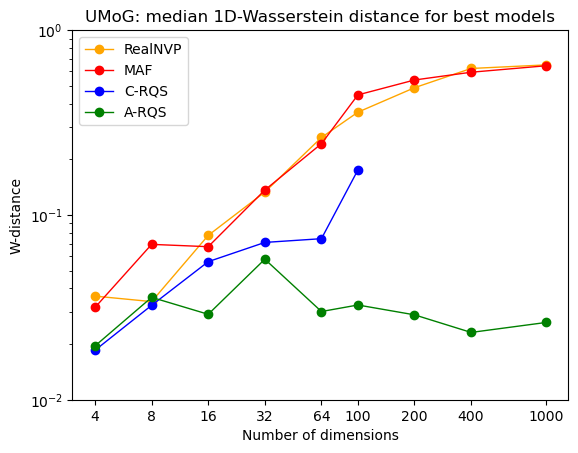

In [56]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_WD:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_WD:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('W-distance')
plt.ylim(0.01,1)
plt.title("UMoG: median 1D-Wasserstein distance for best models")
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_WD_median_uncorr.pdf')
plt.show()
plt.close()

In [57]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_WD[:,0],MsplineN_corr_WD[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="-", linewidth=linewidth)
#for i in MsplineN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_WD[:,0],MsplineN_uncorr_WD[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_WD[:,0],CsplineN_corr_WD[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="-", linewidth=linewidth)
#for i in CsplineN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_WD[:,0],CsplineN_uncorr_WD[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_WD[:,0],MAFN_corr_WD[:,1],point_marker, color='red', label='MAF (corr)', linestyle="-", linewidth=linewidth)
#for i in MAFN_corr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_WD[:,0],MAFN_uncorr_WD[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_WD:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_WD[:,0],RealNVPN_corr_WD[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_corr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_WD[:,0],RealNVPN_uncorr_WD[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_WD:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,0.6)
#plt.title("Un-corr. MoG: median Wasserstein distance for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_WD_median_uncorr.pdf')
#plt.show()
#plt.close()

### KS

In [58]:
MsplineN_corr_KS = extract_lines(df_bests_uncorr,"MsplineN","corr","ks_test_median")
MsplineN_uncorr_KS = extract_lines(df_bests_uncorr,"MsplineN","uncorr","ks_test_median")
CsplineN_corr_KS = extract_lines(df_bests_uncorr,"CsplineN","corr","ks_test_median")
CsplineN_uncorr_KS = extract_lines(df_bests_uncorr,"CsplineN","uncorr","ks_test_median")
MAFN_corr_KS = extract_lines(df_bests_uncorr,"MAFN","corr","ks_test_median")
MAFN_uncorr_KS = extract_lines(df_bests_uncorr,"MAFN","uncorr","ks_test_median")
RealNVPN_corr_KS = extract_lines(df_bests_uncorr,"RealNVPN","corr","ks_test_median")
RealNVPN_uncorr_KS = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","ks_test_median")

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

In [59]:
#KS_threshold=0.000000001
#MsplineN_corr_KS = np.array([x for x in MsplineN_corr_KS if x[1]>KS_threshold])
#MsplineN_uncorr_KS = np.array([x for x in MsplineN_uncorr_KS if x[1]>KS_threshold])
#CsplineN_corr_KS = np.array([x for x in CsplineN_corr_KS if x[1]>KS_threshold])
#CsplineN_uncorr_KS = np.array([x for x in CsplineN_uncorr_KS if x[1]>KS_threshold])
#MAFN_corr_KS = np.array([x for x in MAFN_corr_KS if x[1]>KS_threshold])
#MAFN_uncorr_KS = np.array([x for x in MAFN_uncorr_KS if x[1]>KS_threshold])
#RealNVPN_corr_KS = np.array([x for x in RealNVPN_corr_KS if x[1]>KS_threshold])
#RealNVPN_uncorr_KS = np.array([x for x in RealNVPN_uncorr_KS if x[1]>KS_threshold])

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1740929332.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1740929332.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\1740929332.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(MAFN_c

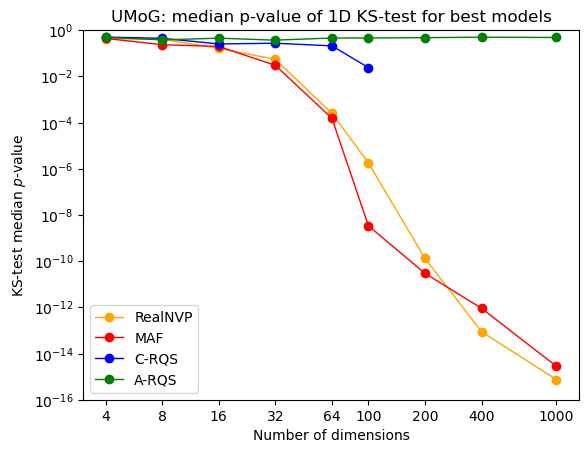

In [67]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_KS:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_KS:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_KS:
        plt.text(i[0]*1.05,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_KS:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('KS-test median $p$-value')
plt.ylim(1e-16,1)
plt.title("UMoG: median p-value of 1D KS-test for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_KS_median_uncorr.pdf')
plt.show()
plt.close()

In [61]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_KS[:,0],MsplineN_corr_KS[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in MsplineN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_KS[:,0],MsplineN_uncorr_KS[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_KS[:,0],CsplineN_corr_KS[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in CsplineN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_KS[:,0],CsplineN_uncorr_KS[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.95, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_KS[:,0],MAFN_corr_KS[:,1],point_marker, color='red', label='MAF (corr)', linestyle="solid", linewidth=linewidth)
#for i in MAFN_corr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_KS[:,0],MAFN_uncorr_KS[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_KS:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_KS[:,0],RealNVPN_corr_KS[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle="solid", linewidth=linewidth)
#for i in RealNVPN_corr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_KS[:,0],RealNVPN_uncorr_KS[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_KS:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.01,1)
#plt.title("Un-corr. MoG: median p-value of KS-test for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_KS_median_uncorr.pdf')
#plt.show()
#plt.close()

### Frobenius-norm

In [68]:
MsplineN_corr_FN = extract_lines(df_bests_uncorr,"MsplineN","corr","frob_norm")
MsplineN_uncorr_FN = extract_lines(df_bests_uncorr,"MsplineN","uncorr","frob_norm")
CsplineN_corr_FN = extract_lines(df_bests_uncorr,"CsplineN","corr","frob_norm")
CsplineN_uncorr_FN = extract_lines(df_bests_uncorr,"CsplineN","uncorr","frob_norm")
MAFN_corr_FN = extract_lines(df_bests_uncorr,"MAFN","corr","frob_norm")
MAFN_uncorr_FN = extract_lines(df_bests_uncorr,"MAFN","uncorr","frob_norm")
RealNVPN_corr_FN = extract_lines(df_bests_uncorr,"RealNVPN","corr","frob_norm")
RealNVPN_uncorr_FN = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","frob_norm")

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2934590966.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2934590966.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2934590966.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(MAFN_c

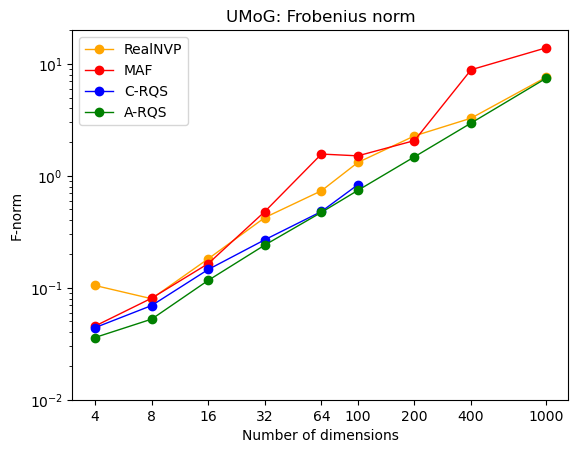

In [70]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_FN[:,0],RealNVPN_corr_FN[:,1],point_marker, color='orange', label='RealNVP', linestyle="-", linewidth=linewidth)
plt.plot(MAFN_corr_FN[:,0],MAFN_corr_FN[:,1],point_marker, color='red', label='MAF', linestyle="-", linewidth=linewidth)
plt.plot(CsplineN_corr_FN[:,0],CsplineN_corr_FN[:,1],point_marker, color='blue', label='C-RQS', linestyle="-", linewidth=linewidth)
plt.plot(MsplineN_corr_FN[:,0],MsplineN_corr_FN[:,1],point_marker, color='green', label='A-RQS', linestyle="-", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_FN:
        plt.text(i[0]*0.85,i[1]*1, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_FN:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_FN:
        plt.text(i[0]*1.05,i[1]*0.8, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_FN:
        plt.text(i[0]*0.85,i[1]*0.75, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('F-norm')
plt.ylim(0.01,20)
plt.title("UMoG: Frobenius norm")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_FN_uncorr.pdf')
plt.show()
plt.close()

### Training time

In [71]:
MsplineN_corr_time = extract_lines(df_bests_uncorr,"MsplineN","corr","time").astype(np.float)
MsplineN_uncorr_time = extract_lines(df_bests_uncorr,"MsplineN","uncorr","time").astype(np.float)
CsplineN_corr_time = extract_lines(df_bests_uncorr,"CsplineN","corr","time").astype(np.float)
CsplineN_uncorr_time = extract_lines(df_bests_uncorr,"CsplineN","uncorr","time").astype(np.float)
MAFN_corr_time = extract_lines(df_bests_uncorr,"MAFN","corr","time").astype(np.float)
MAFN_uncorr_time = extract_lines(df_bests_uncorr,"MAFN","uncorr","time").astype(np.float)
RealNVPN_corr_time = extract_lines(df_bests_uncorr,"RealNVPN","corr","time").astype(np.float)
RealNVPN_uncorr_time = extract_lines(df_bests_uncorr,"RealNVPN","uncorr","time").astype(np.float)

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2258755380.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MsplineN_corr_time = extract_lines(df_bests_uncorr,"MsplineN","corr","time").astype(np.float)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["ndims",metric,"run_n"]].to_numpy().flatten().tolist()
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\4218138265.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = df[df["correlation"]==corr][df["bijector"]==bij][["nd

C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2117279335.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2117279335.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
C:\Users\rtorre\AppData\Local\Temp\ipykernel_19884\2117279335.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
 

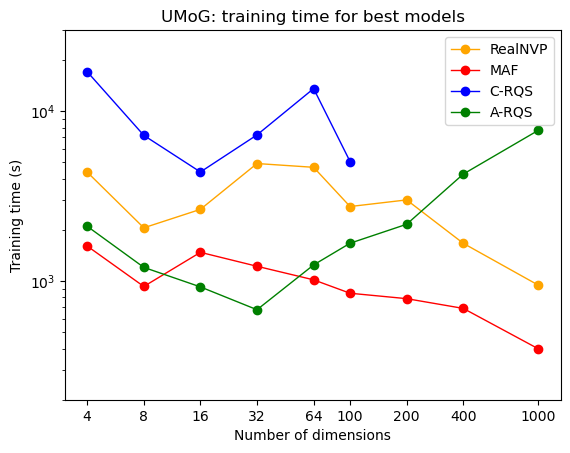

In [72]:
labels=False
jtplot.reset()
linewidth = 1
point_label_size = 8
point_marker = 'go--'#'.'
plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP', linestyle="solid", linewidth=linewidth)
plt.plot(MAFN_corr_time[:,0],MAFN_corr_time[:,1],point_marker, color='red', label='MAF', linestyle="solid", linewidth=linewidth)
plt.plot(CsplineN_corr_time[:,0],CsplineN_corr_time[:,1],point_marker, color='blue', label='C-RQS', linestyle="solid", linewidth=linewidth)
plt.plot(MsplineN_corr_time[:,0],MsplineN_corr_time[:,1],point_marker, color='green', label='A-RQS', linestyle="solid", linewidth=linewidth)
if labels:
    for i in MsplineN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
    for i in CsplineN_corr_time:
        plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
    for i in MAFN_corr_time:
        plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
    for i in RealNVPN_corr_time:
        plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of dimensions')
plt.ylabel('Training time (s)')
plt.ylim(200,30000)
plt.title("UMoG: training time for best models")
#lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
plt.legend()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xticks([4,8,16,32,64,100,200,400,1000], ['4','8','16','32','64','100','200','400','1000'])
plt.savefig(paper_fig_dir + 'Best_training_time_uncorr.pdf')
plt.show()
plt.close()

In [66]:
#jtplot.reset()
#linewidth = 0.3
#point_label_size = 8
#point_marker = '.' #'go--'
#plt.plot(MsplineN_corr_time[:,0],MsplineN_corr_time[:,1],point_marker, color='green', label='Mspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in MsplineN_corr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(MsplineN_uncorr_time[:,0],MsplineN_uncorr_time[:,1],point_marker, color='green', label='Mspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MsplineN_uncorr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='green')
#plt.plot(CsplineN_corr_time[:,0],CsplineN_corr_time[:,1],point_marker, color='blue', label='Cspline (corr)', linestyle="solid", linewidth=linewidth)
#for i in CsplineN_corr_time:
#    plt.text(i[0]*1.05,i[1]*1.03, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(CsplineN_uncorr_time[:,0],CsplineN_uncorr_time[:,1],point_marker, color='blue', label='Cspline (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in CsplineN_uncorr_time:
#    plt.text(i[0]*1.05,i[1]*0.95, str(int(i[2])), fontsize=point_label_size, color='blue')
#plt.plot(MAFN_corr_time[:,0],MAFN_corr_time[:,1],point_marker, color='red', label='MAF (corr)', linestyle="solid", linewidth=linewidth)
#for i in MAFN_corr_time:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(MAFN_uncorr_time[:,0],MAFN_uncorr_time[:,1],point_marker, color='red', label='MAF (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in MAFN_uncorr_time:
#    plt.text(i[0]*1.05,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='red')
#plt.plot(RealNVPN_corr_time[:,0],RealNVPN_corr_time[:,1],point_marker, color='orange', label='RealNVP (corr)', linestyle="solid", linewidth=linewidth)
#for i in RealNVPN_corr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.plot(RealNVPN_uncorr_time[:,0],RealNVPN_uncorr_time[:,1],point_marker, color='orange', label='RealNVP (uncorr)', linestyle=(0, (5, 8)), linewidth=linewidth)
#for i in RealNVPN_uncorr_time:
#    plt.text(i[0]*0.85,i[1]*0.96, str(int(i[2])), fontsize=point_label_size, color='orange')
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(300,30000)
#plt.title("Un-corr. MoG: training time (s) for best models")
##lt.ylim(max(MsplineN_corr_WD[:,1]), min(MsplineN_corr_WD[:,1]))
#plt.legend()
#plt.savefig(paper_fig_dir + 'Best_training_time_uncorr.pdf')
#plt.show()
#plt.close()

## Tables

In [82]:
df_bests_uncorr[0]

,run_n,run_seed,ndims,nsamples,correlation,nbijectors,bijector,activation,spline_knots,ks_test_mean,...,ad_test_mean,ad_test_median,Wasserstein_median,Wasserstein_mean,frob_norm,hidden_layers,batch_size,epochs_input,epochs_output,time
0,4,0,4,100000,corr,5,CsplineN,relu,12,0.472991,...,0.211847,0.216385,0.017652,0.017652,0.022267,128-128-128,512,1000,399,10340.128813
3,4,0,4,100000,corr,2,MsplineN,relu,12,0.465701,...,0.215899,0.215800,0.019549,0.019549,0.035943,256-256-256,512,1000,377,2099.885369
12,3,0,4,100000,corr,10,MAFN,relu,8,0.439230,...,0.217516,0.215212,0.031573,0.031573,0.045468,128-128-128,512,1000,357,1606.117240
14,4,0,4,100000,corr,10,RealNVPN,relu,8,0.402367,...,0.212732,0.213810,0.036360,0.036360,0.104790,256-256-256,256,1000,439,4376.519111


In [91]:
tmp=df_bests_uncorr[8]
print(tmp["ndims"].iloc[0])
tmp=tmp[tmp["correlation"]=="corr"]
tmp=tmp[["hidden_layers","nbijectors","bijector","spline_knots","batch_size","Wasserstein_median", "ks_test_median", "frob_norm","epochs_output","time"]]
tmp["Wasserstein_median"]=tmp["Wasserstein_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["ks_test_median"]=tmp["ks_test_median"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["frob_norm"]=tmp["frob_norm"].apply(lambda x: "{:.2e}".format(float(x)))
tmp["time"]=tmp["time"].apply(lambda x: int(float(x)))
string=tmp.to_latex()
print(string)

1000
\begin{tabular}{llrlrrlllrr}
\toprule
{} & hidden\_layers &  nbijectors &  bijector &  spline\_knots &  batch\_size & Wasserstein\_median & ks\_test\_median & frob\_norm &  epochs\_output &  time \\
\midrule
0 &   256-256-256 &           2 &  MsplineN &             8 &         512 &           2.62e-02 &       4.80e-01 &  7.41e+00 &            448 &  7700 \\
4 &   128-128-128 &           5 &  RealNVPN &             8 &         256 &           6.48e-01 &       7.41e-16 &  7.57e+00 &            120 &   946 \\
\bottomrule
\end{tabular}



C:\Users\Riccardo Torre\AppData\Local\Temp\ipykernel_37828\102249961.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string=tmp.to_latex()
